In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
)

In [2]:
data_path = "/Users/massimilianoarca/Library/CloudStorage/OneDrive-PolitecnicodiMilano/Thames Ecoli/Data"

dir_store_path = os.path.join(data_path, "temporary results")

processed_dataset_path = os.path.join(dir_store_path, "processed_dataset.xlsx")

In [3]:
full_df = pd.read_excel(processed_dataset_path)

In [79]:
ecoli_df = full_df.copy()
coliform_df = full_df.copy()

In [80]:
ecoli_df.drop(columns=["Coliform (1ml)_mean"], inplace=True)
coliform_df.drop(columns=["Ecoli (1ml)_mean"], inplace=True)

In [81]:
# Get tntc values for ecoli and coliform

tntc_ecoli_df = ecoli_df[ecoli_df["Ecoli (1ml)_mean"] == "TNTC"]
tntc_coliform_df = coliform_df[(coliform_df["Coliform (1ml)_mean"] == "TNTC") | (coliform_df["Coliform (1ml)_mean"] == 0)]

In [82]:
# Remove tntc values from ecoli and coliform

ecoli_df.drop(tntc_ecoli_df.index, inplace=True)
coliform_df.drop(tntc_coliform_df.index, inplace=True)

In [83]:
ecoli_df["Ecoli (1ml)_mean"] = ecoli_df["Ecoli (1ml)_mean"].astype(float)
coliform_df["Coliform (1ml)_mean"] = coliform_df["Coliform (1ml)_mean"].astype(float)

In [125]:
# Compute the median for each site
ecoli_df["median"] = ecoli_df.groupby("Site")["Ecoli (1ml)_mean"].transform("median")
coliform_df["median"] = coliform_df.groupby("Site")["Coliform (1ml)_mean"].transform("median")

In [126]:
ecoli_condition = ecoli_df["Ecoli (1ml)_mean"] <= ecoli_df["median"]
coliform_condition = coliform_df["Coliform (1ml)_mean"] <= coliform_df["median"]

In [127]:
ecoli_df["<=median"] = np.where(
    ecoli_condition,
    1,
    0,
)

coliform_df["<=median"] = np.where(
    coliform_condition,
    1,
    0,
)

# Ecoli - Classification

In [87]:
class_ecoli_df = ecoli_df[
    ["Site", "Temp C_mean", "Ph_mean", "Cond (ms)_mean", "<=median"]
]

class_ecoli_df["<=median"] = class_ecoli_df["<=median"].astype("category")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_4877/518504462.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
for site in class_ecoli_df["Site"].unique():
    fig = px.scatter_3d(
        class_ecoli_df[class_ecoli_df["Site"] == site],
        x="Temp C_mean",
        y="Ph_mean",
        z="Cond (ms)_mean",
        color="<=median",
    )
    fig.update_layout(
        title_text="Site: "
        + site
        + " - "
        + "Count: "
        + str(len(class_ecoli_df[class_ecoli_df["Site"] == site]))
        + " - "
        + "Median: "
        + str(ecoli_df[ecoli_df["Site"] == site]["median"].unique())
    )

    fig.add_annotation()
    fig.show()

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Linear vs Non-Linear

In [93]:
class_ecoli_df.drop(columns=["Site"], inplace=True)
class_ecoli_df.dropna(inplace=True)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_4877/1438584363.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_4877/1438584363.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
X = class_ecoli_df.drop(columns=["<=median"])
y = class_ecoli_df["<=median"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)

### Linear Models

In [95]:
logreg = LogisticRegression()
linear_svm = svm.SVC(kernel="linear")

In [96]:
logreg.fit(X_train, y_train)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [97]:
logreg_pred = logreg.predict(X_test)
linear_svm_pred = linear_svm.predict(X_test)

#### Logistic Regression

In [98]:
cf_matrix = confusion_matrix(y_test, logreg_pred)
clf_report = classification_report(
    y_test,
    logreg_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, logreg_pred)

<Axes: >

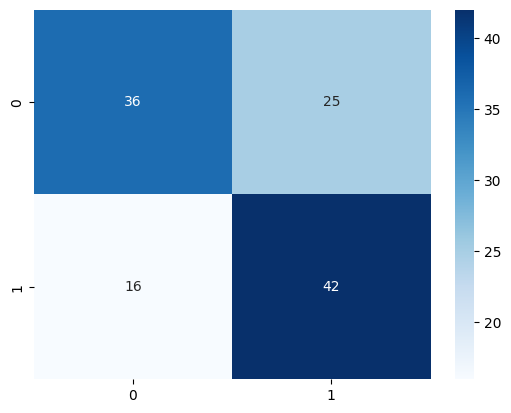

In [99]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

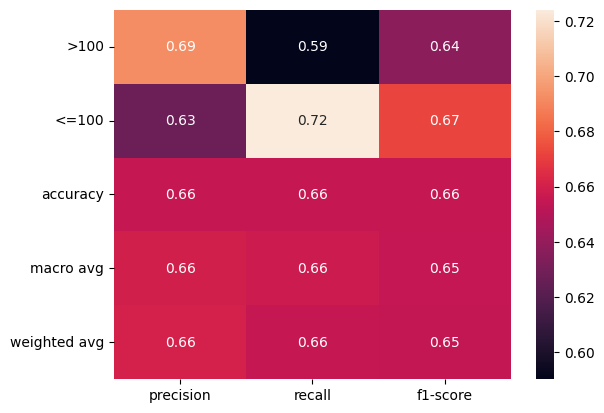

In [100]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [101]:
print("Accuracy: ", acc_score)

Accuracy:  0.6554621848739496


#### Linear SVM

In [102]:
cf_matrix = confusion_matrix(y_test, linear_svm_pred)
clf_report = classification_report(
    y_test,
    linear_svm_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, linear_svm_pred)

<Axes: >

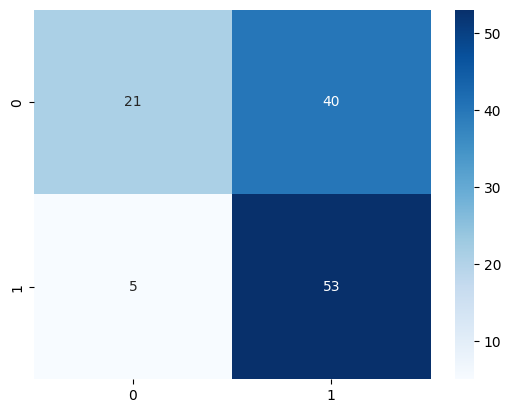

In [103]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

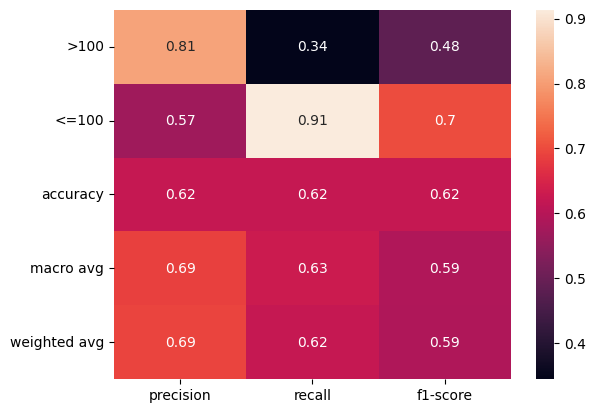

In [104]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [105]:
print("Accuracy: ", acc_score)

Accuracy:  0.6218487394957983


### Non-Linear Models

In [106]:
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
non_linear_svm = svm.SVC(kernel="rbf", gamma="scale")

In [107]:
naive_bayes.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
non_linear_svm.fit(X_train, y_train)

SVC()

In [108]:
naive_bayes_pred = naive_bayes.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
non_linear_svm_pred = non_linear_svm.predict(X_test)

#### Gaussian Naïve Bayes

In [109]:
cf_matrix = confusion_matrix(y_test, naive_bayes_pred)
clf_report = classification_report(
    y_test,
    naive_bayes_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, naive_bayes_pred)

<Axes: >

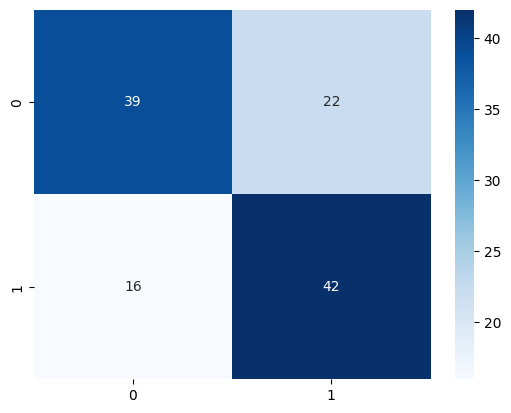

In [110]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

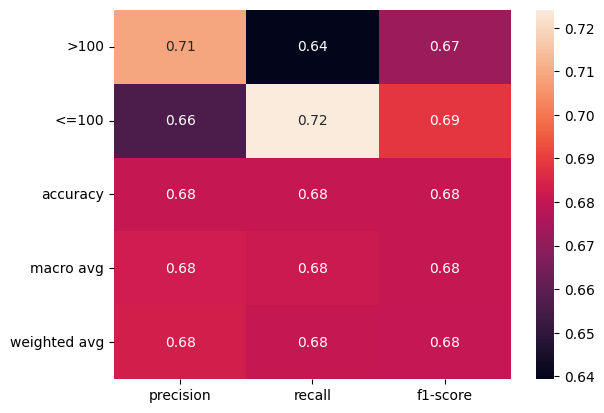

In [111]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [112]:
print("Accuracy: ", acc_score)

Accuracy:  0.680672268907563


#### Decision Tree

In [113]:
cf_matrix = confusion_matrix(y_test, decision_tree_pred)
clf_report = classification_report(
    y_test,
    decision_tree_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, decision_tree_pred)

<Axes: >

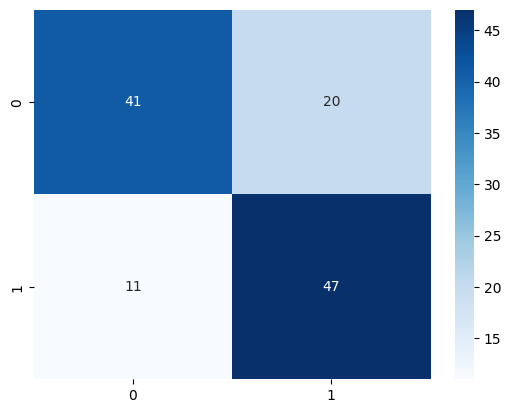

In [114]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

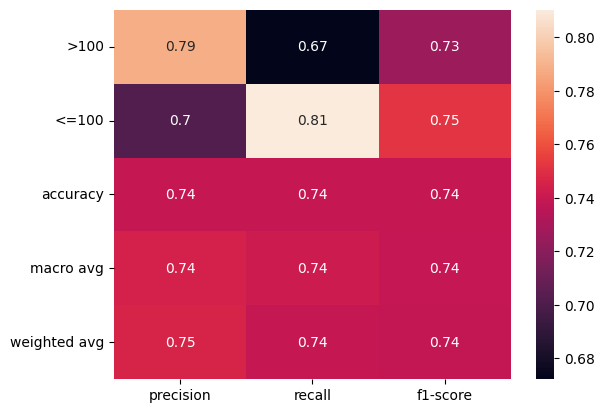

In [115]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [116]:
print("Accuracy: ", acc_score)

Accuracy:  0.7394957983193278


#### Random Forest

In [117]:
cf_matrix = confusion_matrix(y_test, random_forest_pred)
clf_report = classification_report(
    y_test,
    random_forest_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, random_forest_pred)

<Axes: >

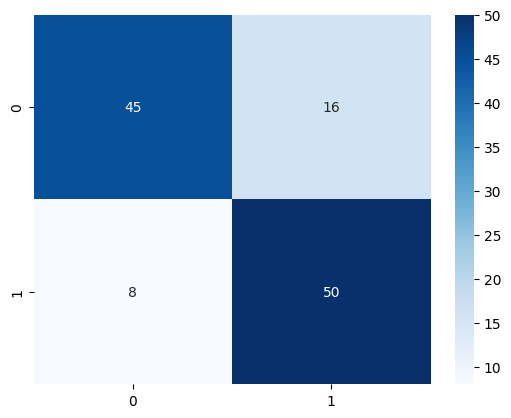

In [118]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

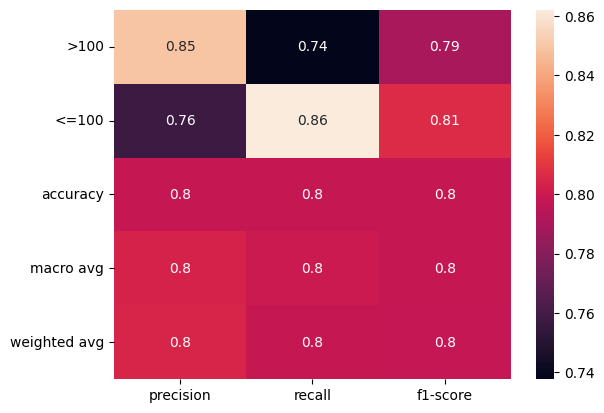

In [119]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [120]:
print("Accuracy: ", acc_score)

Accuracy:  0.7983193277310925


#### Non-Linear SVM

In [121]:
cf_matrix = confusion_matrix(y_test, non_linear_svm_pred)
clf_report = classification_report(
    y_test,
    non_linear_svm_pred,
    labels=[0, 1],
    target_names=[">100", "<=100"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, non_linear_svm_pred)

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

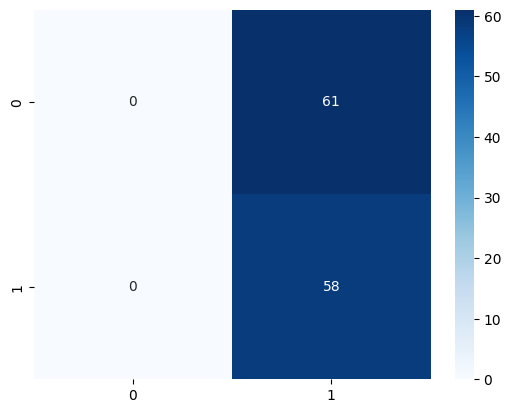

In [122]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

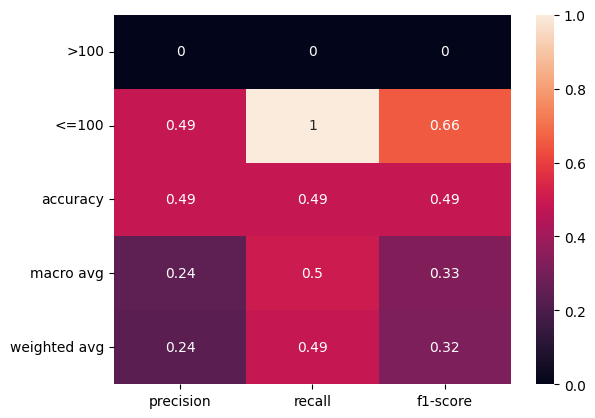

In [123]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [124]:
print("Accuracy: ", acc_score)

Accuracy:  0.48739495798319327


# Coliform - Classification

In [128]:
class_coliform_df = coliform_df[
    ["Site", "Temp C_mean", "Ph_mean", "Cond (ms)_mean", "<=median"]
]

class_coliform_df["<=median"] = class_coliform_df["<=median"].astype("category")

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_4877/3200852975.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
for site in class_coliform_df["Site"].unique():
    fig = px.scatter_3d(
        class_coliform_df[class_coliform_df["Site"] == site],
        x="Temp C_mean",
        y="Ph_mean",
        z="Cond (ms)_mean",
        color="<=median",
    )
    fig.update_layout(
        title_text="Site: "
        + site
        + ", "
        + "Count: "
        + str(len(class_coliform_df[class_coliform_df["Site"] == site]))
        + ", "
        + "Median: "
        + str(coliform_df[coliform_df["Site"] == site]["median"].unique())
    )

    fig.add_annotation()
    fig.show()

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Linear vs Non-Linear

In [96]:
class_coliform_df.drop(columns=["Site"], inplace=True)
class_coliform_df.dropna(inplace=True)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_36210/3283028733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_36210/3283028733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
X = class_coliform_df.drop(columns=["isTNTC"])
y = class_coliform_df["isTNTC"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)

### Linear Models

In [98]:
logreg = LogisticRegression()
linear_svm = svm.SVC(kernel="linear")

In [99]:
logreg.fit(X_train, y_train)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [100]:
logreg_pred = logreg.predict(X_test)
linear_svm_pred = linear_svm.predict(X_test)

#### Logistic Regression

In [101]:
cf_matrix = confusion_matrix(y_test, logreg_pred)
clf_report = classification_report(
    y_test,
    logreg_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, logreg_pred)

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

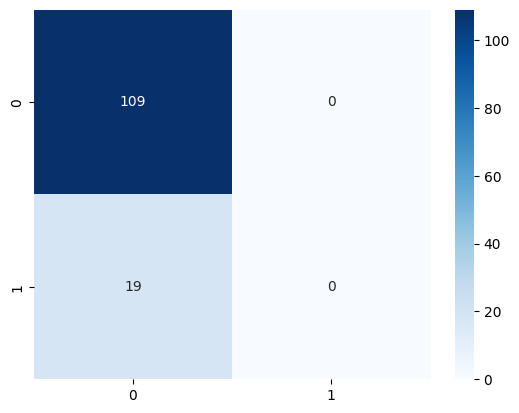

In [102]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

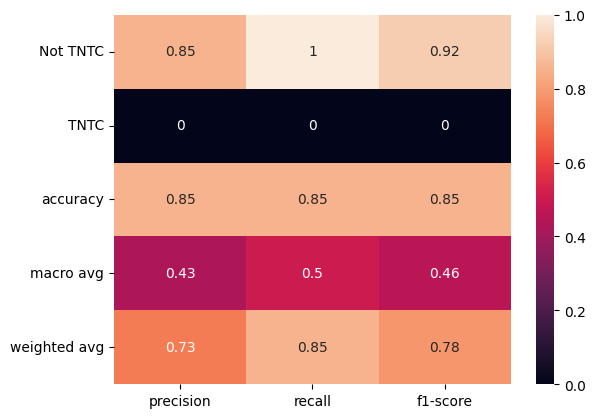

In [103]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [104]:
print("Accuracy: ", acc_score)

Accuracy:  0.8515625


#### Linear SVM

In [105]:
cf_matrix = confusion_matrix(y_test, linear_svm_pred)
clf_report = classification_report(
    y_test,
    linear_svm_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, linear_svm_pred)

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

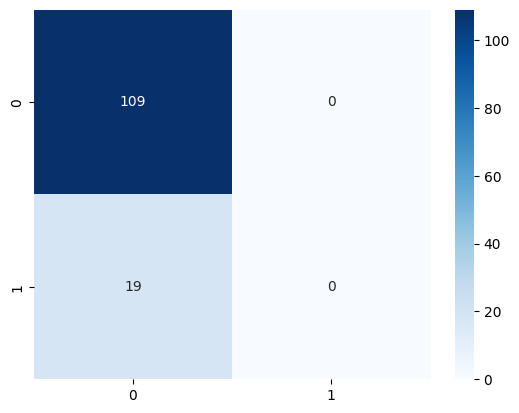

In [106]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

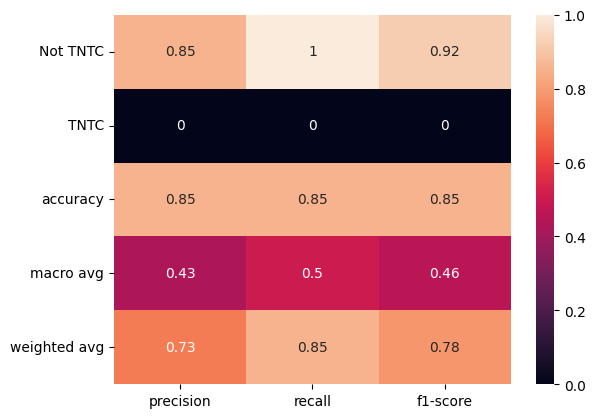

In [107]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [108]:
print("Accuracy: ", acc_score)

Accuracy:  0.8515625


### Non-Linear Models

In [109]:
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
non_linear_svm = svm.SVC(kernel="rbf", gamma="scale")

In [110]:
naive_bayes.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
non_linear_svm.fit(X_train, y_train)

SVC()

In [111]:
naive_bayes_pred = naive_bayes.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
non_linear_svm_pred = non_linear_svm.predict(X_test)

#### Gaussian Naïve Bayes

In [112]:
cf_matrix = confusion_matrix(y_test, naive_bayes_pred)
clf_report = classification_report(
    y_test,
    naive_bayes_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, naive_bayes_pred)

<Axes: >

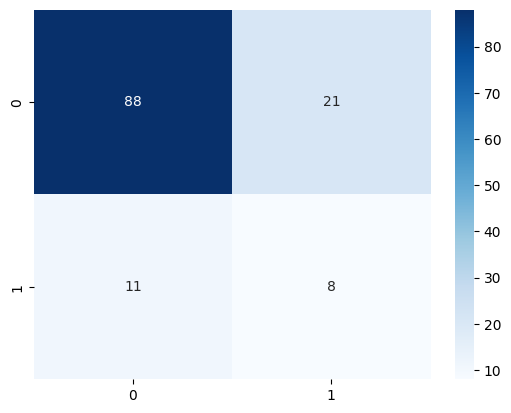

In [113]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

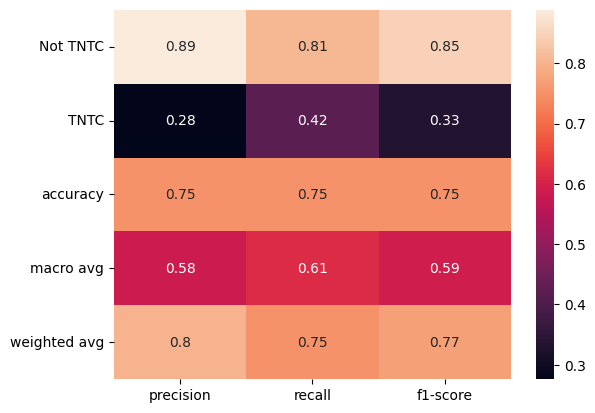

In [114]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [115]:
print("Accuracy: ", acc_score)

Accuracy:  0.75


#### Decision Tree

In [116]:
cf_matrix = confusion_matrix(y_test, decision_tree_pred)
clf_report = classification_report(
    y_test,
    decision_tree_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, decision_tree_pred)

<Axes: >

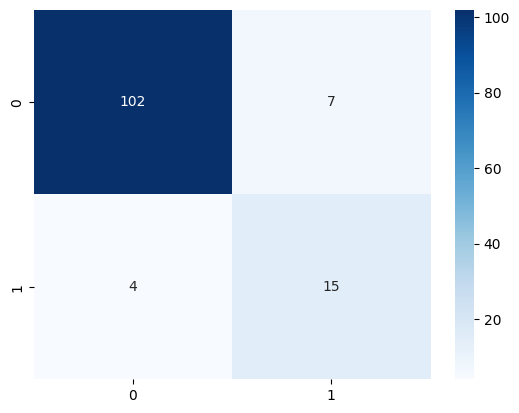

In [117]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

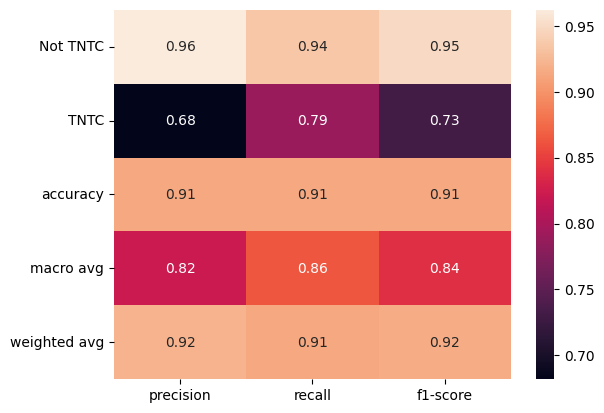

In [118]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [119]:
print("Accuracy: ", acc_score)

Accuracy:  0.9140625


#### Random Forest

In [120]:
cf_matrix = confusion_matrix(y_test, random_forest_pred)
clf_report = classification_report(
    y_test,
    random_forest_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, random_forest_pred)

<Axes: >

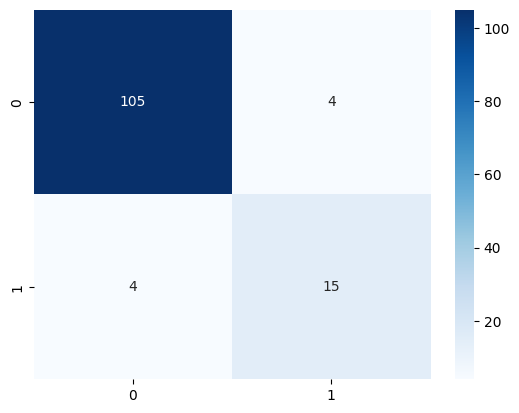

In [121]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

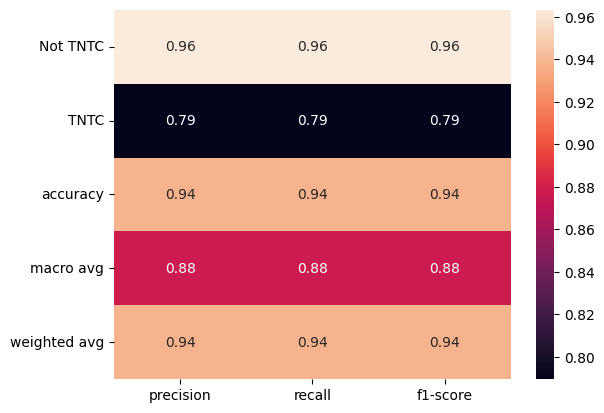

In [122]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [123]:
print("Accuracy: ", acc_score)

Accuracy:  0.9375


#### Non-Linear SVM

In [124]:
cf_matrix = confusion_matrix(y_test, non_linear_svm_pred)
clf_report = classification_report(
    y_test,
    non_linear_svm_pred,
    labels=[0, 1],
    target_names=["Not TNTC", "TNTC"],
    output_dict=True,
)
acc_score = accuracy_score(y_test, non_linear_svm_pred)

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Axes: >

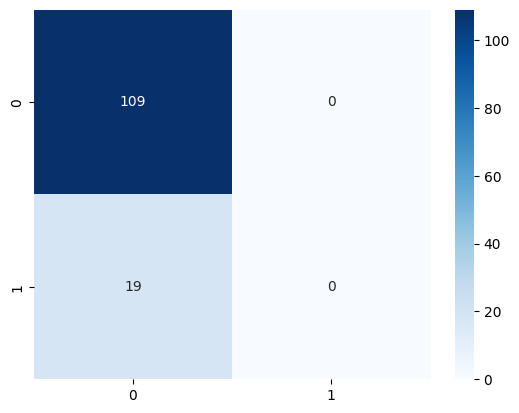

In [125]:
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

<Axes: >

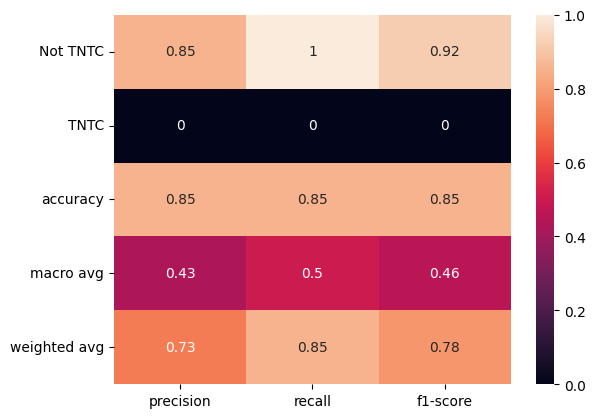

In [126]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [127]:
print("Accuracy: ", acc_score)

Accuracy:  0.8515625


# Classifiers Comparison

In [128]:
from sklearn.model_selection import cross_val_score

In [ ]:
X = class_coliform_df.drop(columns=["isTNTC"])
y = class_coliform_df["isTNTC"]

In [132]:
logreg = LogisticRegression(random_state=42)
linear_svm = svm.SVC(kernel="linear", random_state=42)
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
non_linear_svm = svm.SVC(kernel="rbf", gamma="scale", random_state=42)

In [133]:
classifiers = [
    logreg,
    linear_svm,
    naive_bayes,
    decision_tree,
    random_forest,
    non_linear_svm,
]

for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring="f1")
    print(clf.__class__.__name__, scores)

LogisticRegression [0. 0. 0. 0. 0.]
SVC [0. 0. 0. 0. 0.]
GaussianNB [0.         0.31818182 0.11428571 0.         0.25806452]
DecisionTreeClassifier [0.11428571 0.05714286 0.04761905 0.31578947 0.07407407]
RandomForestClassifier [0.15384615 0.06060606 0.05555556 0.45454545 0.08695652]
SVC [0. 0. 0. 0. 0.]


In [134]:
from sklearn.utils import resample

In [137]:
df_majority = class_coliform_df[class_coliform_df.isTNTC == 0]
df_minority = class_coliform_df[class_coliform_df.isTNTC == 1]

df_majority.shape, df_minority.shape

((257, 4), (62, 4))

In [138]:
df_minority_upsampled = resample(
    df_minority, replace=True, n_samples=257, random_state=42
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [139]:
X, y = df_upsampled.drop(columns=["isTNTC"]), df_upsampled["isTNTC"]

In [140]:
logreg = LogisticRegression(random_state=42)
linear_svm = svm.SVC(kernel="linear", random_state=42)
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
non_linear_svm = svm.SVC(kernel="rbf", gamma="scale", random_state=42)

In [142]:
classifiers = [
    logreg,
    linear_svm,
    naive_bayes,
    decision_tree,
    random_forest,
    non_linear_svm,
]

for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring="f1")
    print(clf.__class__.__name__, scores.mean())

LogisticRegression 0.5269403386957376
SVC 0.5295999632850972
GaussianNB 0.6664370436030559
DecisionTreeClassifier 0.8384704726168142
RandomForestClassifier 0.8324169589398235
SVC 0.6648892687740923
